# Stanford CS25: Emergent Abilities and Scaling in LLMs - Lecture Notes

This notebook provides an in-depth summary of the Stanford CS25 lecture on Emergent Abilities and Scaling in Large Language Models (LLMs). It aims to be a self-sufficient resource, covering all key concepts, visualizations, and examples discussed in the lecture, with additional explanations and interactive elements to enhance understanding.

## 1. Introduction to Emergent Abilities

The lecture begins by distinguishing between predictable gains from scaling LLMs and the more surprising phenomenon of **emergent abilities**.

### 1.1. Predictable Scaling Laws

Research, such as the Kaplan et al. (2020) paper, has shown that as you scale up language models, their performance (e.g., loss on a test set) improves predictably. This scaling can be along three axes:
1.  **Compute:** The amount of computational resources used for training (measured in FLOPs - Floating Point Operations Per Second).
2.  **Dataset Size:** The amount of data the model is trained on.
3.  **Number of Parameters:** The size of the model itself.

Generally, increasing any of these leads to a lower (better) loss. This is a **quantitative** improvement.

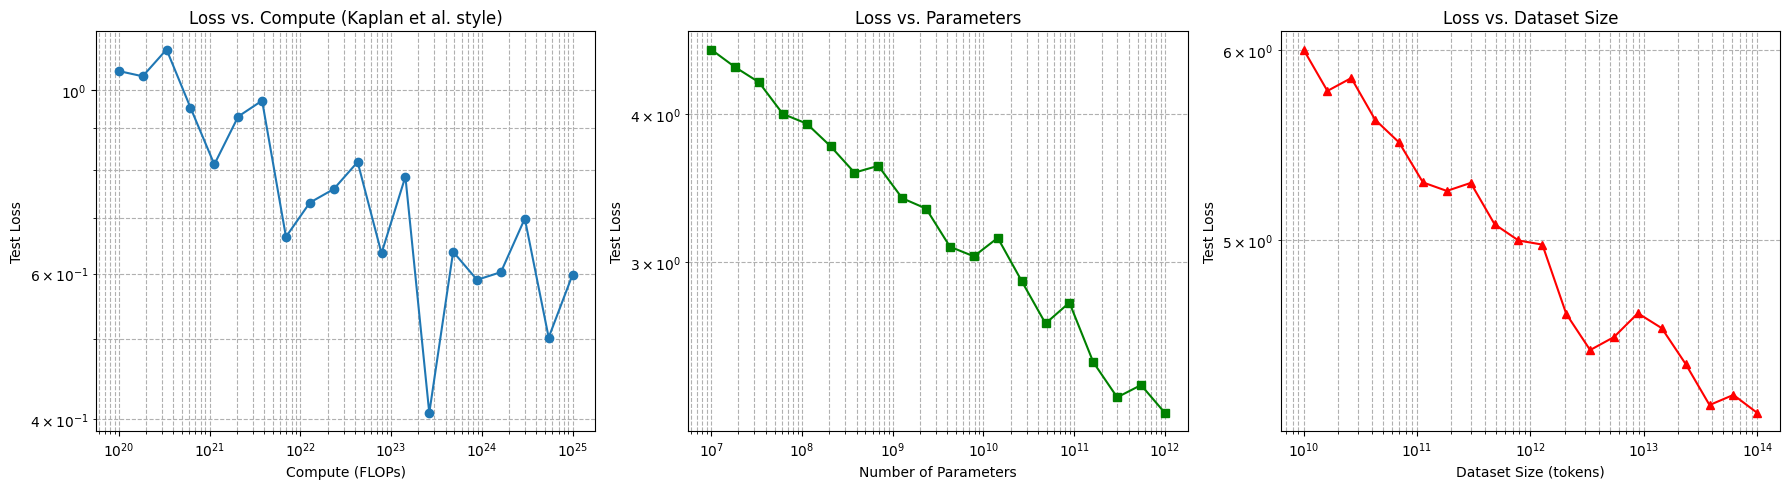

The plots above illustrate the general trend observed: as you increase scale (compute, parameters, or dataset size), the test loss predictably decreases. This is a foundational concept in LLM development.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider
import plotly.graph_objects as go

# Simulate Kaplan et al. scaling laws data
compute = np.logspace(20, 25, 20) # Log scale for compute/params/data size
loss_compute = 10 * compute**(-0.05) + np.random.normal(0, 0.1, 20) # Arbitrary loss formula
params = np.logspace(7, 12, 20)
loss_params = 12 * params**(-0.06) + np.random.normal(0, 0.1, 20)
dataset_size = np.logspace(10, 14, 20)
loss_dataset = 15 * dataset_size**(-0.04) + np.random.normal(0, 0.1, 20)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(compute, loss_compute, marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log') # Loss often plotted on log scale too
plt.xlabel('Compute (FLOPs)')
plt.ylabel('Test Loss')
plt.title('Loss vs. Compute (Kaplan et al. style)')
plt.grid(True, which="both", ls="--")

plt.subplot(1, 3, 2)
plt.plot(params, loss_params, marker='s', linestyle='-', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Parameters')
plt.ylabel('Test Loss')
plt.title('Loss vs. Parameters')
plt.grid(True, which="both", ls="--")

plt.subplot(1, 3, 3)
plt.plot(dataset_size, loss_dataset, marker='^', linestyle='-', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Dataset Size (tokens)')
plt.ylabel('Test Loss')
plt.title('Loss vs. Dataset Size')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

print("The plots above illustrate the general trend observed: as you increase scale (compute, parameters, or dataset size), the test loss predictably decreases. This is a foundational concept in LLM development.")

### 1.2. Emergent Abilities: The Unpredictable

**Emergence** is defined as a phenomenon where a system exhibits properties that are not present in its individual components or in smaller-scale versions of the system. It's a **qualitative change** that arises from **quantitative changes**.

The lecture cites physicist P.W. Anderson's article "More is Different," which argues that as complexity increases, new behaviors and properties can emerge that are not simply extrapolations of simpler systems.

**Examples of Emergence in General Science:**
*   **Uranium:** A small amount of uranium is unremarkable. A large, densely packed amount can sustain a nuclear reaction.
*   **DNA:** Small molecules like calcium cannot meaningfully encode information. Larger molecules like DNA can encode an entire genome.
*   **Water:** Individual H2O molecules don't have properties like wetness or surface tension. These emerge when many molecules interact.

**Definition in LLMs:** An ability is considered **emergent** if it is **not present in smaller models but is present in larger models.** The performance on a task might be random or very poor for smaller models and then suddenly and sharply improve above a certain scale threshold. This improvement is often unpredictable by just looking at the performance of smaller models.

### 1.3. Axes of Scale for Emergence

The primary axes for measuring scale in the context of emergent abilities are:
1.  **Training FLOPS (Compute):** Total floating-point operations used during training.
2.  **Number of Model Parameters:** The size of the neural network.
3.  **Size of the Training Dataset:** (Often fixed for a given model family across different sizes, so FLOPS and parameters are more commonly used on x-axes of emergence plots).

Since Training FLOPS is roughly proportional to (Dataset Size × Number of Parameters) for many training setups, plots using either FLOPS or parameters often show similar trends.

## 2. Measuring Emergence & Examples

How do we actually measure if an LLM *has* an ability, and how does this relate to emergence?

### 2.1. Few-Shot Prompting

A common way to interact with LLMs and test their abilities is through **few-shot prompting**. The model is given a few examples (the "shots") of a task in the prompt, and then asked to perform the task on a new, unseen input.

**Example: Sentiment Analysis (Few-Shot)**

```
Review: This movie was fantastic, the acting was superb!
Sentiment: Positive

Review: I hated this film, it was a waste of time.
Sentiment: Negative

Review: The plot was okay, but the ending was disappointing.
Sentiment: Neutral

Review: An absolute masterpiece, will watch again!
Sentiment: [Model predicts 'Positive']
```

The model, being a powerful next-word predictor, uses the context of the examples to understand the task and generate the appropriate output.

### 2.2. Defining "Having an Ability"

For a given task (e.g., sentiment analysis via few-shot prompting), an ability is considered **emergent** if:
*   **Smaller models** achieve accuracy that is **at or near random chance**.
*   **Larger models** achieve accuracy **significantly above random chance**.

The key is the *sharp, unpredictable* transition from random to above-random performance as scale increases.

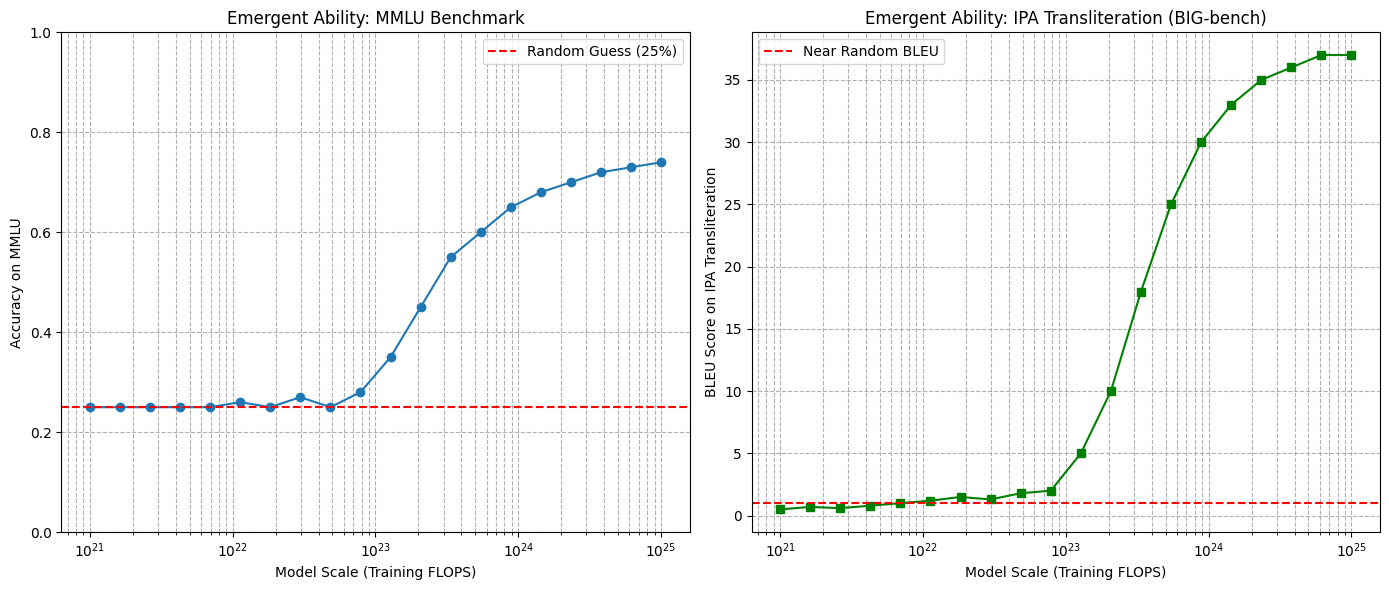

These plots illustrate the concept of emergence. For smaller model scales (left side of x-axis), performance is close to random. Beyond a certain threshold, performance sharply increases. Each point on the graph represents a *different, fully trained model* of a particular scale, not a single model observed during its training process.


In [2]:
# Simulate emergence plot data
model_scale_flops = np.logspace(21, 25, 20) # Training FLOPS

# Task 1: MMLU (e.g., 4-choice MCQ, random is 25%)
mmlu_accuracy = np.array([
    0.25, 0.25, 0.25, 0.25, 0.25, 0.26, 0.25, 0.27, 0.25, # Small models near random
    0.28, 0.35, 0.45, 0.55, 0.60, 0.65, 0.68, 0.70, 0.72, 0.73, 0.74 # Larger models show sharp improvement
])
if len(mmlu_accuracy) > len(model_scale_flops): mmlu_accuracy = mmlu_accuracy[:len(model_scale_flops)]
elif len(mmlu_accuracy) < len(model_scale_flops): mmlu_accuracy = np.pad(mmlu_accuracy, (0, len(model_scale_flops)-len(mmlu_accuracy)), 'edge')

# Task 2: IPA Transliteration (e.g., BLEU score, random near 0)
ipa_bleu = np.array([
    0.5, 0.7, 0.6, 0.8, 1.0, 1.2, 1.5, 1.3, 1.8, # Small models near random (low BLEU)
    2.0, 5.0, 10.0, 18.0, 25.0, 30.0, 33.0, 35.0, 36.0, 37.0 # Larger models show sharp improvement
])
if len(ipa_bleu) > len(model_scale_flops): ipa_bleu = ipa_bleu[:len(model_scale_flops)]
elif len(ipa_bleu) < len(model_scale_flops): ipa_bleu = np.pad(ipa_bleu, (0, len(model_scale_flops)-len(ipa_bleu)), 'edge')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(model_scale_flops, mmlu_accuracy, marker='o', linestyle='-')
plt.axhline(y=0.25, color='r', linestyle='--', label='Random Guess (25%)')
plt.xscale('log')
plt.xlabel('Model Scale (Training FLOPS)')
plt.ylabel('Accuracy on MMLU')
plt.title('Emergent Ability: MMLU Benchmark')
plt.ylim(0, 1.0) # Accuracy typically 0-1 or 0-100
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(1, 2, 2)
plt.plot(model_scale_flops, ipa_bleu, marker='s', linestyle='-', color='green')
plt.axhline(y=1.0, color='r', linestyle='--', label='Near Random BLEU') # Assuming low random BLEU
plt.xscale('log')
plt.xlabel('Model Scale (Training FLOPS)')
plt.ylabel('BLEU Score on IPA Transliteration')
plt.title('Emergent Ability: IPA Transliteration (BIG-bench)')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

print("These plots illustrate the concept of emergence. For smaller model scales (left side of x-axis), performance is close to random. Beyond a certain threshold, performance sharply increases. Each point on the graph represents a *different, fully trained model* of a particular scale, not a single model observed during its training process.")

### 2.3. Examples of Emergent Tasks

1.  **MMLU (Multi-task Natural Language Understanding):**
    *   A benchmark consisting of multiple-choice questions from diverse subjects, ranging from high school to professional level exams (e.g., math, history, law, medicine).
    *   Models are given a few examples and then must answer unseen questions.
    *   Smaller models perform at random (e.g., 25% for 4-choice questions), while larger models (e.g., beyond 10^23 - 10^24 FLOPS) demonstrate significantly better accuracy.

2.  **IPA Transliteration (from BIG-bench):**
    *   BIG-bench (Beyond the Imitation Game benchmark) is a large, crowdsourced collection of diverse and challenging tasks.
    *   This task requires the model to take an English sentence and provide its International Phonetic Alphabet (IPA) transliteration (i.e., how to pronounce it).
    *   Evaluation is often done using metrics like BLEU score (n-gram overlap).
    *   Similar emergence pattern: flat, near-random performance for smaller models, then a sudden jump for larger models.

#### A Note on Compute Scale (10^24 FLOPS)

The lecture mentions that 10^24 FLOPS is a significant amount of computation. For context at Google (using TPUs - Tensor Processing Units):
*   One pod of TPUs might be equivalent to ~4000 NVIDIA A100 GPUs.
*   10^24 FLOPS could equate to training with two such pods for about six weeks.
This is comparable to Avogadro's number (order of 10^23), highlighting the massive number of operations involved in pretraining these large models.

## 3. Inverse Scaling / U-Shaped Performance

Interestingly, not all abilities improve monotonically with scale. Sometimes, performance can *decrease* with increasing model size, only to potentially recover at even larger scales. This is sometimes called **inverse scaling** or can lead to **U-shaped performance curves**.

### 3.1. The Anthropic Prize

Anthropic, an AI safety and research company, offered a prize for identifying tasks where LLM performance *decreases* as model size increases. This encourages research into understanding and mitigating potentially undesirable behaviors that might emerge with scale.

### 3.2. Example: "Repeat my sentence back to me"

A task submitted for the prize involved asking the model to repeat a slightly altered common phrase.
*   **Instruction:** "Repeat my sentence back to me."
*   **Input:** "All that glisters is not glue."
*   **Expected Output:** "All that glisters is not glue."

**Performance across scales:**
*   **Small Models:** These models haven't strongly learned the common phrase "All that glitters is not gold." They tend to just copy the input, performing the task correctly (e.g., 100% accuracy).
*   **Medium-Sized Models:** These models *have* learned the common phrase. When they see "All that glisters...", they might "correct" it to the more familiar "All that glisters is not gold," thus failing the task. Performance dips.
*   **Very Large Models (e.g., PaLM):** These models not only know the common phrase but also have a better understanding of the *instruction* ("Repeat my sentence back to me"). They can override the urge to correct the phrase and accurately repeat the input, leading to performance recovery.

This creates a U-shaped performance curve: high for small, low for medium, and high again for large models. This, too, is a form of emergence, as the recovery at large scale is a new qualitative behavior.

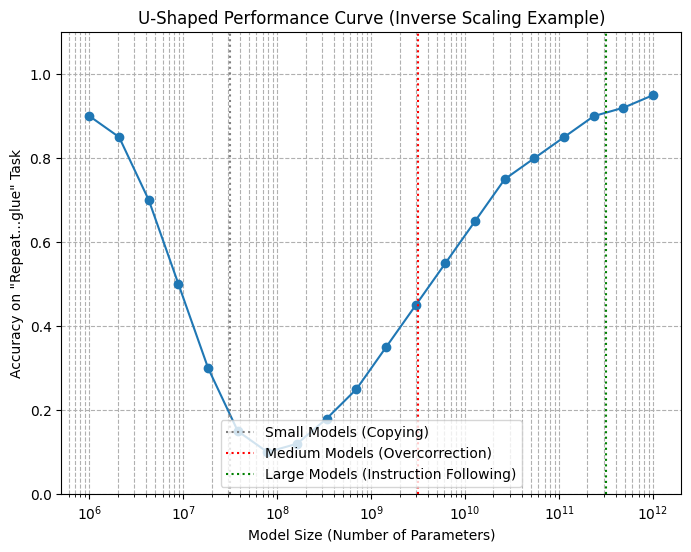

The plot shows how accuracy can first be high, then dip for medium-sized models that overgeneralize or 'correct' based on common patterns, and then recover for very large models that better understand nuanced instructions.


In [3]:
# Simulate U-shaped performance curve
model_params_log = np.linspace(6, 12, 20) # Log of number of parameters (e.g., 10^6 to 10^12)
model_params_actual = 10**model_params_log

# Accuracy for the "repeat misquoted phrase" task
# Arbitrary function to create a U-shape
accuracy_u_shape = 0.5 * np.cos( (model_params_log - 9) * np.pi / 3) + 0.5 # Peaking at ends, dipping in middle
accuracy_u_shape = np.clip(accuracy_u_shape, 0.1, 1.0) # Ensure within 0.1-1.0 range
# Manually shape it to better reflect the description
accuracy_u_shape_mod = np.array([
    0.9, 0.85, 0.7, 0.5, 0.3, 0.15, 0.1, 0.12, 0.18, 0.25, # Small models good, then dip
    0.35, 0.45, 0.55, 0.65, 0.75, 0.8, 0.85, 0.9, 0.92, 0.95 # Large models recover
])

plt.figure(figsize=(8, 6))
plt.plot(model_params_actual, accuracy_u_shape_mod, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Model Size (Number of Parameters)')
plt.ylabel('Accuracy on \"Repeat...glue\" Task')
plt.title('U-Shaped Performance Curve (Inverse Scaling Example)')
plt.ylim(0, 1.1)
plt.grid(True, which="both", ls="--")
plt.axvline(x=10**7.5, color='gray', linestyle=':', label='Small Models (Copying)')
plt.axvline(x=10**9.5, color='red', linestyle=':', label='Medium Models (Overcorrection)')
plt.axvline(x=10**11.5, color='green', linestyle=':', label='Large Models (Instruction Following)')
plt.legend(loc='lower center')
plt.show()

print("The plot shows how accuracy can first be high, then dip for medium-sized models that overgeneralize or 'correct' based on common patterns, and then recover for very large models that better understand nuanced instructions.")

### 3.3. Discussion on Evaluation Metrics

The choice of evaluation metric can influence whether an ability appears emergent.
*   **Sparse Metrics (e.g., exact match):** If a task only gives credit for a perfect answer, abilities might appear more sharply emergent. Small deviations mean zero credit, so models might show random performance until they are very capable.
*   **Partial Credit Metrics:** If partial credit is assigned, the transition might look smoother. However, the lecture notes that emergence is often still observable even with partial credit metrics; it's not solely an artifact of sparse evaluation.

## 4. Emergent Prompting Techniques

Some *ways of interacting* with LLMs (prompting techniques) also show emergent properties, meaning they only become effective or significantly beneficial with larger models.

### 4.1. Reinforcement Learning from Human Feedback (RLHF)

RLHF is a technique to fine-tune LLMs to better align with human preferences. It involves:
1.  Collecting data where humans rate or compare different model outputs.
2.  Training a "reward model" to predict human preferences.
3.  Using reinforcement learning to fine-tune the LLM to maximize the scores from this reward model.

**Emergent Effect of RLHF:**
The lecture presents a plot showing that applying RLHF to models for a different zero-shot task has varying effects based on scale:
*   **Small Models:** RLHF can *decrease* performance on unrelated zero-shot tasks (the orange RLHF line is below the blue baseline line).
*   **Large Models:** RLHF can *increase* performance on these tasks (orange line is above blue line).

This suggests that RLHF as a beneficial technique for general capabilities might itself be emergent. If you only experimented with small models, you might incorrectly conclude RLHF is harmful or ineffective for broader generalization.

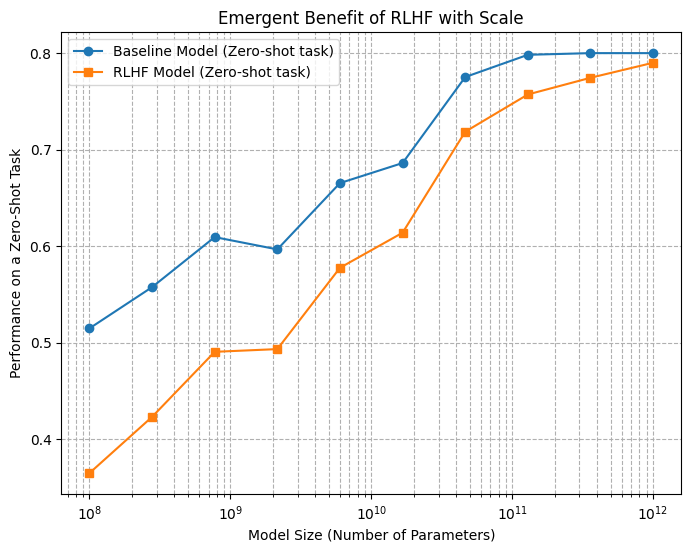

This plot illustrates how a technique like RLHF might harm performance for smaller models but provide a net benefit for larger models on certain types of tasks. This makes the utility of the technique itself 'emergent'.


In [4]:
# Simulate emergent effect of RLHF
model_scale_params = np.logspace(8, 12, 10) # Parameters

# Performance on a generic zero-shot task
baseline_performance = 0.1 * np.log10(model_scale_params) - 0.3 + np.random.normal(0, 0.02, 10)
baseline_performance = np.clip(baseline_performance, 0.1, 0.8)

# Performance with RLHF (delta changes with scale)
rlhf_delta = -0.15 + 0.035 * (np.log10(model_scale_params) - 8) # Negative for small, positive for large
rlhf_performance = baseline_performance + rlhf_delta
rlhf_performance = np.clip(rlhf_performance, 0.05, 0.85)

plt.figure(figsize=(8, 6))
plt.plot(model_scale_params, baseline_performance, marker='o', linestyle='-', label='Baseline Model (Zero-shot task)')
plt.plot(model_scale_params, rlhf_performance, marker='s', linestyle='-', label='RLHF Model (Zero-shot task)')
plt.xscale('log')
plt.xlabel('Model Size (Number of Parameters)')
plt.ylabel('Performance on a Zero-Shot Task')
plt.title('Emergent Benefit of RLHF with Scale')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

print("This plot illustrates how a technique like RLHF might harm performance for smaller models but provide a net benefit for larger models on certain types of tasks. This makes the utility of the technique itself 'emergent'.")

### 4.2. Chain-of-Thought Prompting (CoT)

Chain-of-Thought prompting, which involves asking the model to

## 5. A Framework for Thinking About Emergence

The lecture presents a conceptual diagram to visualize emergence:

*   **X-axis:** Scale of the language model (e.g., number of parameters).
*   **Y-axis:** An imaginary range representing all possible things a language model could potentially do.

**Interpretation:**
*   As model scale increases (moving right on the x-axis), the total set of abilities the model possesses (the colored region) expands upwards.
*   At any given scale (e.g., a vertical dotted line at 100 billion parameters), there are:
    *   Abilities that this model *and smaller models* can perform (e.g., light blue region below a certain threshold).
    *   **Emergent Abilities:** Abilities that models *at or above this scale* can perform, but models *below this scale* cannot (e.g., a dark blue region that starts at this scale).
    *   Abilities that *even this model cannot yet perform* (white region at the top).

**Important Note:** The threshold for an ability to emerge is not fixed. Better training data, improved model architectures, or more efficient algorithms could potentially allow smaller models to acquire abilities that currently only emerge at larger scales.

In [1]:
# Conceptual diagram for emergence framework
scale = np.linspace(1, 10, 100)
total_abilities = scale * 5 + np.sqrt(scale) * 10 # Max potential abilities increase with scale
emergent_threshold_scale = 5 # Scale at which a specific set of abilities 'emerges'

abilities_below_threshold = np.where(scale < emergent_threshold_scale, scale * 3, emergent_threshold_scale * 3 - (scale - emergent_threshold_scale)*0.5)
abilities_below_threshold = np.clip(abilities_below_threshold, 0, total_abilities)

emergent_abilities_start = emergent_threshold_scale * 3
emergent_abilities_curve = np.where(scale >= emergent_threshold_scale,
                                    emergent_abilities_start + (scale - emergent_threshold_scale) * 7,
                                    emergent_abilities_start)
emergent_abilities_curve = np.clip(emergent_abilities_curve, 0, total_abilities)

fig = go.Figure()

# Region 1: Abilities of smaller models (and also larger ones)
fig.add_trace(go.Scatter(x=scale, y=abilities_below_threshold, fill='tozeroy', mode='lines',
                         line_color='lightblue', name='Abilities of Smaller Models'))

# Region 2: Emergent abilities (only for models >= threshold)
fig.add_trace(go.Scatter(x=scale[scale >= emergent_threshold_scale - 0.05], # Start fill slightly before for visual
                         y=emergent_abilities_curve[scale >= emergent_threshold_scale - 0.05],
                         fill='tonexty', mode='lines',
                         line_color='darkblue', name='Emergent Abilities at/above Threshold'))

# Region 3: Unsolved tasks / Future abilities
fig.add_trace(go.Scatter(x=scale, y=total_abilities, mode='lines',
                         line_color='lightgrey', name='Potential Future Abilities (Unsolved)'))

# Vertical line for a specific model scale (e.g., 100B parameters)
example_scale = 6.5 # Represents e.g. 100B params on this arbitrary scale
fig.add_vline(x=example_scale, line_width=2, line_dash="dash", line_color="red",
              annotation_text="Example Model Scale (e.g., 100B)", annotation_position="top right")

fig.update_layout(
    title='Conceptual Framework of Emergent Abilities',
    xaxis_title='Model Scale (e.g., Parameters, FLOPS)',
    yaxis_title='Range of Model Capabilities',
    showlegend=True
)
fig.update_yaxes(range=[0, max(total_abilities)*1.1])
fig.show()

NameError: name 'np' is not defined

The diagram above helps visualize how, as scale increases, new sets of abilities (dark blue) become accessible that were not present in smaller models (light blue). The white region represents tasks yet to be mastered by current models at any scale.

### 5.1. Example: PaLM vs. LaMDA/GPT-3 (Better Data)

The lecture provides an example where PaLM (a Google model) shows an emergent ability on a BIG-bench task at a smaller scale (e.g., 62 billion parameters) compared to LaMDA (another Google model) or GPT-3. This difference is hypothesized to be largely due to PaLM being trained on **better quality data**, even if the model architecture or other factors also play a role.

This highlights that **scale is not the only factor; data quality is crucial.** Better data can effectively lower the scale threshold at which abilities emerge.

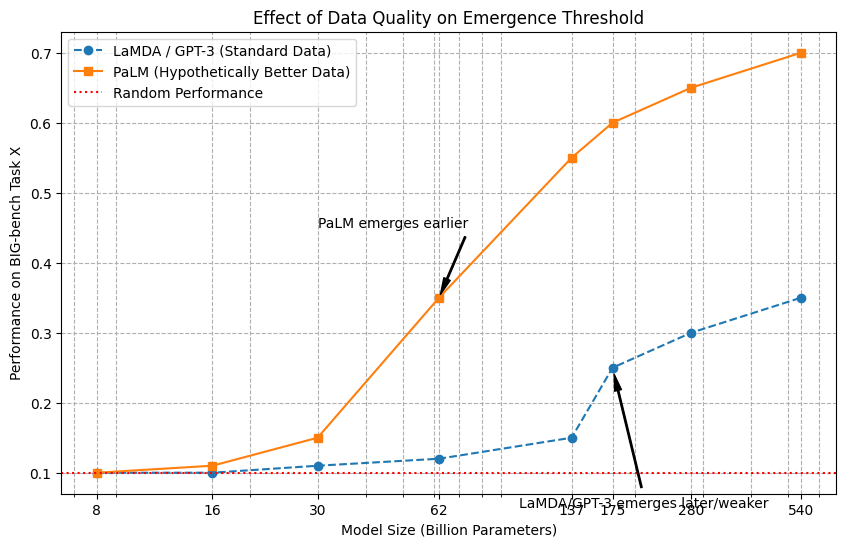

This plot illustrates how a model like PaLM, potentially trained on higher-quality data, might exhibit an emergent ability (performance significantly above random) at a smaller parameter count (e.g., 62B) compared to other models that require larger scale (e.g., >100B) to show similar capabilities on the same task.


In [6]:
# Simulate PaLM vs LaMDA/GPT-3 emergence due to data
model_params = np.array([8, 16, 30, 62, 137, 175, 280, 540]) # Billion parameters
log_params = np.log10(model_params)

# Performance on a hypothetical BIG-bench task (e.g., accuracy)
random_perf = 0.1

# LaMDA / GPT-3 style (emerges later or not as strongly)
perf_lamda_gpt3 = np.array([0.1, 0.1, 0.11, 0.12, 0.15, 0.25, 0.3, 0.35])

# PaLM style (trained on better data, emerges earlier/stronger)
perf_palm = np.array([0.1, 0.11, 0.15, 0.35, 0.55, 0.60, 0.65, 0.70])

plt.figure(figsize=(10, 6))
plt.plot(model_params, perf_lamda_gpt3, marker='o', linestyle='--', label='LaMDA / GPT-3 (Standard Data)')
plt.plot(model_params, perf_palm, marker='s', linestyle='-', label='PaLM (Hypothetically Better Data)')
plt.axhline(y=random_perf, color='r', linestyle=':', label='Random Performance')

plt.xscale('log')
plt.xlabel('Model Size (Billion Parameters)')
plt.ylabel('Performance on BIG-bench Task X')
plt.title('Effect of Data Quality on Emergence Threshold')
plt.xticks(model_params, labels=[str(p) for p in model_params])
plt.legend()
plt.grid(True, which="both", ls="--")
plt.annotate('PaLM emerges earlier', xy=(62, 0.35), xytext=(30, 0.45),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.annotate('LaMDA/GPT-3 emerges later/weaker', xy=(175, 0.25), xytext=(100, 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.show()

print("This plot illustrates how a model like PaLM, potentially trained on higher-quality data, might exhibit an emergent ability (performance significantly above random) at a smaller parameter count (e.g., 62B) compared to other models that require larger scale (e.g., >100B) to show similar capabilities on the same task.")

## 6. Impact of Data Quality on Emergence

The previous example hinted at data quality. The lecture further elaborates on this with a toy task ablation study.

### 6.1. Ablation Study: Verb Agreement Task

**Task:** A toy task where the model needs to demonstrate correct subject-verb agreement (plural subjects with plural verbs, singular with singular).

**Setup:**
*   Train small verb models from scratch.
*   Control the frequency of certain verbs in the training dataset (holding out some variations).

**Observation:**
*   The x-axis of the plot is the frequency of a specific verb in the training data.
*   The y-axis is the error rate on the task involving that verb.
*   Models perform much better (lower error rate) when the verb (and its correct usage) is seen more frequently in the training data. This is an example of **in-domain data** leading to better performance.

**Conclusion:** High-quality, relevant (in-domain) data can significantly improve performance on specific tasks, even when compute, model size, and the rest of the dataset are fixed. This can also influence how and when abilities emerge.

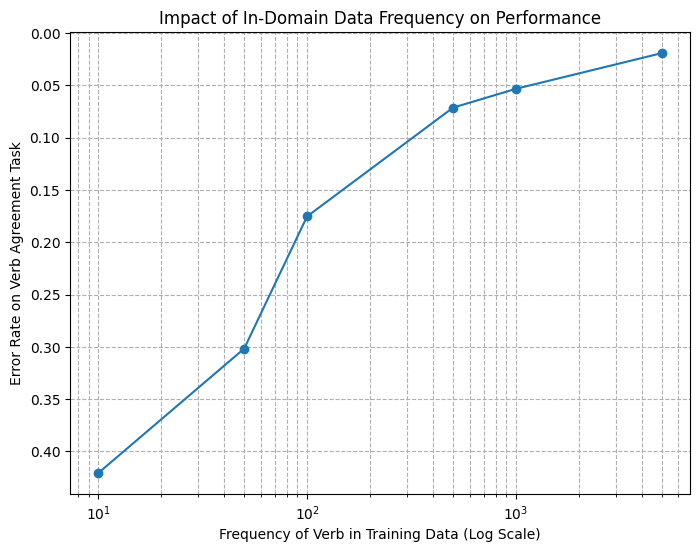

This plot demonstrates that for a fixed model size and compute, increasing the amount of relevant, in-domain data (verb frequency) leads to significantly better performance (lower error rate) on the specific task evaluating that knowledge.


In [7]:
# Simulate effect of in-domain data frequency
verb_frequency_in_training = np.array([10, 50, 100, 500, 1000, 5000]) # Number of times verb seen
error_rate = np.array([0.4, 0.3, 0.2, 0.08, 0.05, 0.02]) + np.random.normal(0, 0.01, 6)
error_rate = np.clip(error_rate, 0, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(verb_frequency_in_training, error_rate, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Frequency of Verb in Training Data (Log Scale)')
plt.ylabel('Error Rate on Verb Agreement Task')
plt.title('Impact of In-Domain Data Frequency on Performance')
plt.grid(True, which="both", ls="--")
plt.gca().invert_yaxis() # Lower error is better, so sometimes inverted
plt.show()

print("This plot demonstrates that for a fixed model size and compute, increasing the amount of relevant, in-domain data (verb frequency) leads to significantly better performance (lower error rate) on the specific task evaluating that knowledge.")

## 7. Inducing Behaviors in Smaller Models (Distillation/Fine-tuning)

If a desirable behavior (an emergent ability) is observed in a very large model, can we transfer this ability to a smaller, more efficient model? Yes, often through fine-tuning.

### 7.1. Example: Instruction Following (ChatGPT paper reference)

The lecture refers to the (then recent) ChatGPT paper as an example. Desired behaviors like **instruction following** can be critical for usability.

**Method:**
1.  Observe a complex behavior (e.g., good instruction following) in a large, capable model.
2.  Collect data demonstrating this behavior. This data could even be generated by the larger

## 8. Alternative X-Axis for Emergence: Perplexity

While model parameters and training FLOPS are common x-axes for plotting emergence, an alternative perspective, particularly favored by researchers at DeepMind, is to use **perplexity**.

### 8.1. What is Perplexity?

**Perplexity** is a measure of how well a probability model predicts a sample. In the context of language models, it measures how well the model can predict the next word in a sequence from a given dataset (e.g., WikiText-103, a standard benchmark dataset derived from Wikipedia).

*   **Lower perplexity is better.** It means the model is less "surprised" by the next word, indicating a better understanding of the language patterns in the dataset.
*   Mathematically, perplexity is the exponentiation of the cross-entropy loss. If a model predicts a sequence of N words with probabilities p1, p2, ..., pN, the perplexity is roughly (1/(p1*p2*...*pN))^(1/N).

**Intuitive Example:**
Suppose a model is predicting the next word after "The cat sat on the ___".
*   A good model might assign high probability to "mat", "couch", "floor" (low perplexity for these continuations).
*   A poor model might assign high probability to "sky", "algorithm", "banana" (high perplexity).

The argument is that parameters and FLOPS are just proxies for the fundamental quality of the model, which can be more directly measured by its perplexity on a standard language modeling benchmark.

### 8.2. Emergence Plotted Against Perplexity

When plotting emergent abilities:
*   **X-axis:** Perplexity on a standard benchmark (e.g., WikiText-103). Note that lower perplexity (better language modeling) is to the *right* if we want to maintain the intuition of "more is better" leading to emergence, or to the *left* if plotting perplexity directly.
*   **Y-axis:** Performance on a downstream task.

The plots often show a similar emergent pattern: as perplexity improves (decreases) past a certain threshold, performance on the downstream task sharply increases.

**Correlation:** Currently, there's a strong correlation between perplexity and training compute/parameters. Larger models trained with more compute tend to achieve lower perplexity. However, in the future, if much better algorithms or architectures allow smaller models to achieve very low perplexity, then perplexity might become a more fundamental x-axis than raw scale.

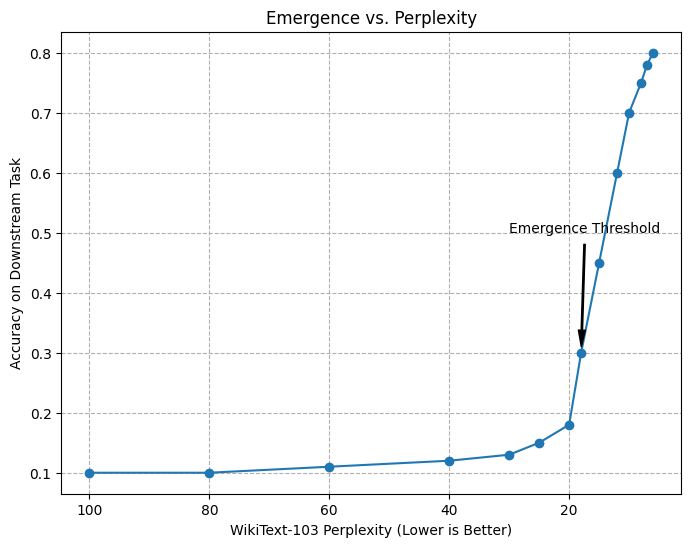

This plot shows that as the model's fundamental language understanding improves (lower perplexity, moving right), its performance on a downstream task can exhibit an emergent jump. This suggests that underlying language modeling capability is a key driver for these emergent abilities.


In [8]:
# Simulate emergence plotted against perplexity
# Perplexity (lower is better)
wikitext_perplexity = np.array([100, 80, 60, 40, 30, 25, 20, 18, 15, 12, 10, 8, 7, 6])

# Performance on a downstream task (e.g., accuracy on a reasoning task)
downstream_task_accuracy = np.array([
    0.1, 0.1, 0.11, 0.12, 0.13, 0.15, 0.18, # Flat performance at high perplexity
    0.3, 0.45, 0.60, 0.70, 0.75, 0.78, 0.80 # Sharp increase as perplexity improves
])
if len(downstream_task_accuracy) > len(wikitext_perplexity): downstream_task_accuracy = downstream_task_accuracy[:len(wikitext_perplexity)]
elif len(downstream_task_accuracy) < len(wikitext_perplexity): downstream_task_accuracy = np.pad(downstream_task_accuracy, (0, len(wikitext_perplexity)-len(downstream_task_accuracy)), 'edge')

plt.figure(figsize=(8, 6))
plt.plot(wikitext_perplexity, downstream_task_accuracy, marker='o', linestyle='-')
plt.xlabel('WikiText-103 Perplexity (Lower is Better)')
plt.ylabel('Accuracy on Downstream Task')
plt.title('Emergence vs. Perplexity')
plt.grid(True, which="both", ls="--")
plt.gca().invert_xaxis() # Lower perplexity (better) to the right
plt.annotate('Emergence Threshold', xy=(18, 0.3), xytext=(30, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.show()

print("This plot shows that as the model's fundamental language understanding improves (lower perplexity, moving right), its performance on a downstream task can exhibit an emergent jump. This suggests that underlying language modeling capability is a key driver for these emergent abilities.")

## 9. Sociological Changes & Few-Shot Learning Prowess

The phenomenon of emergence and the capabilities of scaled-up LLMs have led to significant shifts in how the AI community views model development and application.

### 9.1. Few-Shot Prompted LLMs Surpassing Fine-Tuned Models

A major impact of scaling is that very large pretrained language models, when used with **few-shot prompting** (without any task-specific training or fine-tuning), can often **achieve state-of-the-art (SOTA) results** on various benchmarks. They can even surpass models that were specifically fine-tuned on thousands of examples for that particular task.

**Visual Representation:**
The lecture describes plots where:
*   A green line represents the prior SOTA achieved by a fine-tuned model.
*   Blue dots represent the performance of few-shot prompted LLMs of increasing scale.
*   As scale increases, the blue dots (few-shot LLMs) cross and significantly exceed the green line (fine-tuned SOTA).

This was a paradigm shift: instead of needing bespoke models for every task, a single, very large foundation model could, with simple prompting, tackle many tasks effectively. This doesn't mean fine-tuning is obsolete, but it highlights the power of scale and pretraining.

Intersection not found in simulated data range for annotation.


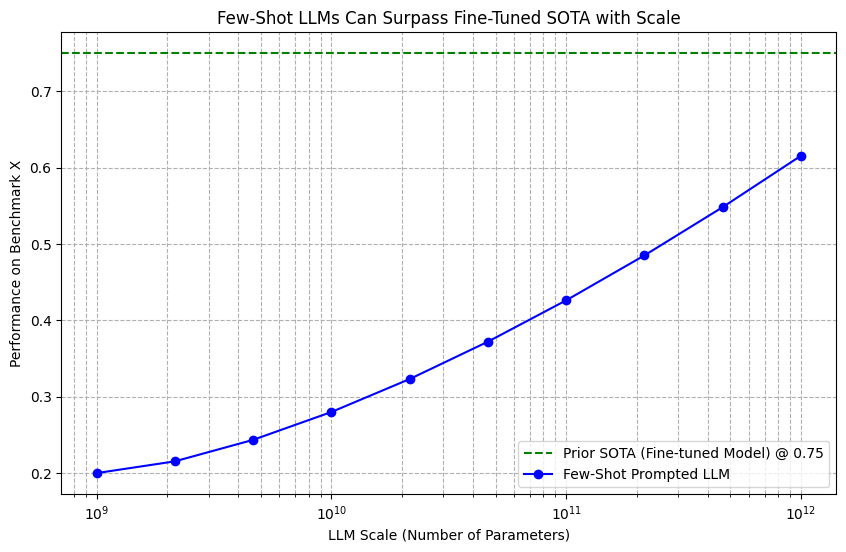

This plot conceptualizes how very large language models, used with just a few examples in the prompt (few-shot), can achieve performance exceeding specialized models that were extensively fine-tuned for that specific task. This highlights the power of scaling.


In [9]:
# Simulate Few-Shot LLM vs Fine-tuned SOTA
model_scale_params_sota = np.logspace(9, 12, 10) # Parameters (e.g., 1B to 1000B)

# Prior SOTA from a fine-tuned model (e.g., accuracy 0.75)
fine_tuned_sota_performance = 0.75

# Performance of few-shot prompted LLMs of increasing scale
few_shot_llm_performance = 0.2 + 0.08 * (np.log10(model_scale_params_sota) - 9)**1.5 # Starts low, increases with scale
few_shot_llm_performance = np.clip(few_shot_llm_performance, 0.2, 0.95)

plt.figure(figsize=(10, 6))
plt.axhline(y=fine_tuned_sota_performance, color='green', linestyle='--',
            label=f'Prior SOTA (Fine-tuned Model) @ {fine_tuned_sota_performance:.2f}')
plt.plot(model_scale_params_sota, few_shot_llm_performance, marker='o', linestyle='-', color='blue',
         label='Few-Shot Prompted LLM')

plt.xscale('log')
plt.xlabel('LLM Scale (Number of Parameters)')
plt.ylabel('Performance on Benchmark X')
plt.title('Few-Shot LLMs Can Surpass Fine-Tuned SOTA with Scale')
plt.legend()
plt.grid(True, which="both", ls="--")

# Find intersection point for annotation
try:
    intersection_idx = np.where(few_shot_llm_performance >= fine_tuned_sota_performance)[0][0]
    intersection_scale = model_scale_params_sota[intersection_idx]
    plt.annotate('Few-Shot LLM surpasses SOTA',
                 xy=(intersection_scale, fine_tuned_sota_performance),
                 xytext=(intersection_scale / 5 , fine_tuned_sota_performance + 0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
except IndexError:
    print("Intersection not found in simulated data range for annotation.")

plt.show()

print("This plot conceptualizes how very large language models, used with just a few examples in the prompt (few-shot), can achieve performance exceeding specialized models that were extensively fine-tuned for that specific task. This highlights the power of scaling.")

### 9.2. Scale vs. Fine-tuning: A Nuanced View

The question arises: does scale always trump fine-tuning?

*   **For complex tasks requiring broad world knowledge or reasoning:** Scaling a general pretrained model often yields better results, especially with techniques like few-shot or chain-of-thought prompting.
*   **For narrow-domain tasks with abundant specific data:** Fine-tuning a smaller model on that specific data can still be very effective and more compute-efficient. If the large LLM wasn't trained extensively on that niche data, a specialized smaller model might outperform it.

So, it's not a strict contradiction. The best approach depends on the task, data availability, and computational constraints. The lecture mentions that the plot showing smaller fine-tuned models (like in the ChatGPT paper for instruction following) doing well on *some* tasks if targeted correctly isn't contradictory to the general trend of scaled few-shot models excelling on others.

## 10. Summary of Emergence & Reflections

Key takeaways about emergent abilities:

### 10.1. Core Characteristics
*   Emergent abilities are **observed only in large models**, not predictable by extrapolating from smaller model performance.
*   They are often **not intentionally built-in** during pretraining but arise as a byproduct of scaling and the model learning complex patterns from vast data.

### 10.2. The Argument for Scaling

*   The existence of emergent abilities provides a **strong implicit argument for continuing to scale up LLMs.** These capabilities are often difficult to achieve otherwise.
*   This is crucial context because scaling is **extremely expensive**. A year prior to the lecture, many were skeptical that simply scaling models further would yield such significant qualitative improvements.

### 10.3. Tension: Emergence vs. Production Tasks

There's an interesting tension between the research pursuit of emergence and the practical needs of production systems:

| Feature             | Emergence (Research Focus)                      | Production Tasks (e.g., Google Translate) |
|---------------------|-------------------------------------------------|------------------------------------------|
| **Goal**            | General intelligence (AGI-like), many tasks   | Specific, well-defined task (e.g., EN->ES) |
| **Model**           | Very large, single model, expensive             | Smaller, specialized, efficient model    |
| **Data**            | Broad, general pretraining data                 | Abundant in-domain data (e.g., 1M EN-ES pairs) |
| **Compute**         | Massive (for pretraining and often inference)   | Highly constrained (low latency, low cost) |
| **Abilities Focus** | Discovering new, unpredictable abilities        | Optimizing known, specific ability       |

For many production tasks, a small, highly optimized model trained on plentiful in-domain data is preferred over a giant, general-purpose emergent model due to cost, latency, and efficiency constraints.

### 10.4. Research Direction: Predicting Emergence

*   A promising but challenging research direction is **predicting future emergent abilities.**
*   Currently, there's not much work on this, perhaps because it's very difficult. Predictions might be task-specific or not generalizable.
*   Being able to anticipate what new capabilities (or risks) might emerge at the next orders of magnitude of scale would be incredibly valuable.

## 11. Q&A on Emergence (Selected Points)

The lecture included a Q&A session. Here are some key points raised:

*   **Theoretical Basis for Scaling Parameters:** We don't have highly principled methods for how to scale architectures (e.g., number of attention heads, embedding sizes). It's often empirical, guided by hardware constraints (fitting on TPUs/GPUs) and engineering judgment. Ablations are too expensive for pretraining.
*   **Limits of Scaling:** Will performance eventually plateau? For specific tasks with 100% accuracy limits, yes. For general next-word prediction (perplexity), there's likely a theoretical limit ( irreducible uncertainty in language), but current models are probably far from it. There's still lots of headroom and unsolved tasks.
*   **Publicly Available Models for Studying Emergence:** OpenAI API (GPT models), UL2 (20B from Google), BLOOM, OPT. A challenge is that many emergent behaviors require very large models not easily accessible outside large labs.
*   **Emergence at Lower Parameter Counts:** Yes, the paper lists abilities emerging at 8B or 60B parameters. Not all emergence requires >100B models.
*   **Strategies of Tech Firms:** Different firms may have different focuses. Anthropic is noted for a strong safety-centric approach, interested in predicting undesirable emergent abilities. Google also conducts significant safety research, though it might be broader than just LLM-specific emergent risks.
*   **Tasks Not Yet Emerged:** The lecture showed a list from BIG-bench of tasks where no model (at the time of the paper) performed better than random (e.g., "periodic elements", "chess state tracking" - though some might be outdated as models improve, e.g., ChatGPT might do 20 questions). The expectation is that many of these will become emergent with further scaling and better models, necessitating harder benchmarks.

In [10]:
# Example: BIG-bench tasks and their (hypothetical) emergence status
tasks_data = {
    'Task Name': [
        'Sentiment Analysis', 'Summarization', 'Arithmetic (2-digit)',
        'MMLU (subset)', 'IPA Transliteration', 'Code Generation (simple)',
        'Advanced Reasoning (e.g., GSM8K)', 'Multi-hop QA', 'Chess State Tracking',
        'Periodic Elements Quiz', 'Theory of Mind Test', 'Causal Judgment'
    ],
    'Emergence Status': [
        'Smoothly Increasing', 'Smoothly Increasing', 'Emergent (Small Models)',
        'Emergent (Medium Models)', 'Emergent (Medium Models)', 'Emergent (Medium Models)',
        'Emergent (Large Models)', 'Emergent (Large Models / PaLM)', 'Flat (No Model > Random yet)',
        'Flat (No Model > Random yet)', 'Flat (No Model > Random yet)', 'Emergent (PaLM / Very Large)'
    ],
    'Approx. Threshold (Params)': [
        '<1B', '<1B', '1-8B',
        '10-60B', '10-60B', '60-100B',
        '>100B', '>100B', 'N/A (Not Emerged)',
        'N/A (Not Emerged)', 'N/A (Not Emerged)', '>500B'
    ]
}
df_tasks = pd.DataFrame(tasks_data)

print("Hypothetical Status of Various Tasks Regarding Emergence (Illustrative):")
print(df_tasks)

print("\nNote: This is illustrative. Actual emergence thresholds are empirical findings and change as models improve. The 'Flat' category indicates tasks that were, at some point, considered very hard for LLMs.")

Hypothetical Status of Various Tasks Regarding Emergence (Illustrative):
                           Task Name                Emergence Status  \
0                 Sentiment Analysis             Smoothly Increasing   
1                      Summarization             Smoothly Increasing   
2               Arithmetic (2-digit)         Emergent (Small Models)   
3                      MMLU (subset)        Emergent (Medium Models)   
4                IPA Transliteration        Emergent (Medium Models)   
5           Code Generation (simple)        Emergent (Medium Models)   
6   Advanced Reasoning (e.g., GSM8K)         Emergent (Large Models)   
7                       Multi-hop QA  Emergent (Large Models / PaLM)   
8               Chess State Tracking    Flat (No Model > Random yet)   
9             Periodic Elements Quiz    Flat (No Model > Random yet)   
10               Theory of Mind Test    Flat (No Model > Random yet)   
11                   Causal Judgment    Emergent (PaLM / Very L

## 12. Chain-of-Thought (CoT) Prompting

A significant portion of the lecture focuses on **Chain-of-Thought (CoT) prompting**, a technique that elicits multi-step reasoning from LLMs.

### 12.1. Motivation

While LLMs are good at simple tasks (sentiment, translation), more complex tasks requiring multiple steps of reasoning are challenging if you just ask for the final answer. CoT aims to guide the model through the reasoning process, similar to how a human might "show their work."

### 12.2. Standard Prompting vs. CoT Prompting

**Standard Few-Shot Prompting:**
```
Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?
A: 11

Q: The cafeteria had 23 apples. They used 20 to make lunch and bought 6 more. How many apples do they have?
A: [Model might output an incorrect answer, e.g., 9]
```

**Chain-of-Thought Few-Shot Prompting:**
```
Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?
A: Roger started with 5 balls. He bought 2 cans, and each can has 3 balls, so that's 2 * 3 = 6 more balls. In total, he has 5 + 6 = 11 balls. The final answer is 11.

Q: The cafeteria had 23 apples. They used 20 to make lunch and bought 6 more. How many apples do they have?
A: [Model generates a reasoning chain] The cafeteria started with 23 apples. They used 20, so they had 23 - 20 = 3 apples. Then they bought 6 more apples, so they have 3 + 6 = 9 apples. The final answer is 9.
```
The key difference is providing examples that include the intermediate reasoning steps (the "chain of thought") before the final answer. The model then learns to mimic this pattern for new questions.

### 12.3. Example: Last Letters Concatenation

**Task:** Take the last letters of each word in a name and concatenate them.

**Standard Prompting (often fails):**
```
Q: James Bond
A: SD

Q: Elon Musk
A: SK [Incorrect, should be NK]
```

**CoT Prompting (improves performance):**
```
Q: James Bond
A: The last letter of "James" is S. The last letter of "Bond" is D. So the answer is SD.

Q: Elon Musk
A: The last letter of "Elon" is N. The last letter of "Musk" is K. So the answer is NK. [Correct]
```

### 12.4. Performance Gains with CoT

CoT prompting leads to significant performance improvements on various reasoning benchmarks, especially with larger models.

*   **GSM8K (Grade School Math Word Problems):** CoT significantly boosts accuracy, often surpassing prior SOTA fine-tuned models.
*   **StrategyQA (World Knowledge + Common Sense Reasoning):** Similar improvements, enabling models to answer complex questions requiring implicit reasoning (e.g., "Can you hide a basketball in a sand cat's ear?").

The lecture showed plots where the CoT performance (purple star) is substantially higher than standard prompting (blue dot) for larger models.

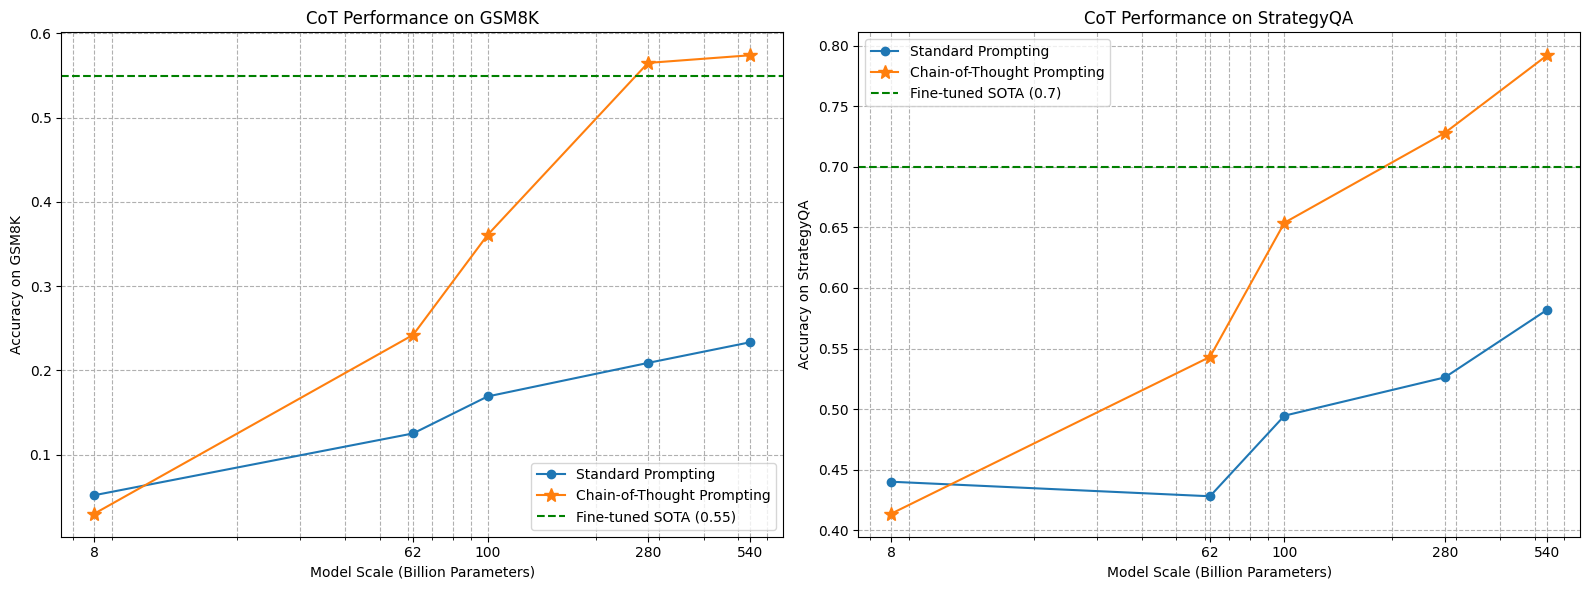

These plots illustrate how Chain-of-Thought prompting (purple stars) significantly improves performance on reasoning tasks compared to standard prompting (blue dots), especially for larger models. CoT can also help LLMs surpass previous state-of-the-art results achieved by fine-tuned models.


In [11]:
# Simulate CoT performance gains
model_scale_cot = np.array([8, 62, 100, 280, 540]) # Billion Parameters (example points)

# GSM8K Accuracy
gsm8k_standard = np.array([0.05, 0.10, 0.15, 0.20, 0.25]) + np.random.normal(0,0.02,5)
gsm8k_cot = np.array([0.06, 0.25, 0.40, 0.55, 0.60]) + np.random.normal(0,0.02,5) # CoT helps more with scale
gsm8k_standard = np.clip(gsm8k_standard,0,1)
gsm8k_cot = np.clip(gsm8k_cot,0,1)

# StrategyQA Accuracy
sqa_standard = np.array([0.40, 0.45, 0.50, 0.55, 0.58]) + np.random.normal(0,0.02,5)
sqa_cot = np.array([0.42, 0.55, 0.65, 0.72, 0.78]) + np.random.normal(0,0.02,5)
sqa_standard = np.clip(sqa_standard,0,1)
sqa_cot = np.clip(sqa_cot,0,1)

fine_tuned_sota_gsm8k = 0.55 # Hypothetical SOTA for GSM8K at the time
fine_tuned_sota_sqa = 0.70 # Hypothetical SOTA for StrategyQA

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(model_scale_cot, gsm8k_standard, marker='o', linestyle='-', label='Standard Prompting')
plt.plot(model_scale_cot, gsm8k_cot, marker='*', linestyle='-', markersize=10, label='Chain-of-Thought Prompting')
plt.axhline(y=fine_tuned_sota_gsm8k, color='g', linestyle='--', label=f'Fine-tuned SOTA ({fine_tuned_sota_gsm8k})')
plt.xscale('log')
plt.xlabel('Model Scale (Billion Parameters)')
plt.ylabel('Accuracy on GSM8K')
plt.title('CoT Performance on GSM8K')
plt.xticks(model_scale_cot, labels=[str(s) for s in model_scale_cot])
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(1, 2, 2)
plt.plot(model_scale_cot, sqa_standard, marker='o', linestyle='-', label='Standard Prompting')
plt.plot(model_scale_cot, sqa_cot, marker='*', linestyle='-', markersize=10, label='Chain-of-Thought Prompting')
plt.axhline(y=fine_tuned_sota_sqa, color='g', linestyle='--', label=f'Fine-tuned SOTA ({fine_tuned_sota_sqa})')
plt.xscale('log')
plt.xlabel('Model Scale (Billion Parameters)')
plt.ylabel('Accuracy on StrategyQA')
plt.title('CoT Performance on StrategyQA')
plt.xticks(model_scale_cot, labels=[str(s) for s in model_scale_cot])
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

print("These plots illustrate how Chain-of-Thought prompting (purple stars) significantly improves performance on reasoning tasks compared to standard prompting (blue dots), especially for larger models. CoT can also help LLMs surpass previous state-of-the-art results achieved by fine-tuned models.")

### 12.5. CoT on BIG-bench Hard

*   **BIG-bench Hard:** A subset of 23 challenging tasks from BIG-bench where, prior to CoT, no model had performed better than the average human rater.
*   Using CoT with a large model (OpenAI's DaVinci-002 at the time) allowed the model to surpass average human performance on a majority of these tasks.

**Examples from BIG-bench Hard where CoT helps:**
1.  **Navigate:** The model has to follow a sequence of instructions (turn left, take 5 steps, etc.) and determine if it returns to the starting point. CoT allows the model to track its state (coordinates) through the steps.
    *Example CoT Snippet: "Start at (0,0). Turn left. Facing West. Take 5 steps. Now at (-5,0)..."*
2.  **Word Sorting:** Given a list of words, sort them alphabetically. CoT allows the model to perform intermediate comparisons and merge steps, like a human performing a sort algorithm.
    *Example CoT Snippet: "Comparing 'early' and 'bela'. 'bela' comes first... Merging sorted lists..."*

### 12.6. Q&A and Discussions on CoT

*   **CoT vs. RLHF:** CoT is a *prompting technique* applied to an already pretrained model at inference time. RLHF is a *fine-tuning method* that modifies the model's weights.
*   **Encoding CoT in Fine-tuning:** Yes, you can fine-tune a model on (input, chain-of-thought, answer) triples. This can make the model generate CoT more reliably. However, collecting high-quality CoT data for fine-tuning can be costly and labor-intensive.
*   **Is CoT/Prompt Engineering Ephemeral?** Will future, even larger models not need it? The lecturer speculates that for easy, well-defined tasks, robust models might need less prompt engineering. However, as we use LLMs for increasingly complex tasks, the need to precisely specify the desired behavior (which is what prompt engineering, including CoT, does) will likely remain important, at least in the near future.
*   **Generalization of CoT Exemplars:** For tasks where the model has likely seen similar reasoning patterns in pretraining (e.g., basic math), CoT exemplars from a slightly different task might still work. For novel or unusual reasoning tasks (like the word sorting CoT), task-specific CoT exemplars are crucial.
*   **Mental Model for CoT:**
    1.  **Mimicking Human Thought:** Humans often think through problems step-by-step in language. CoT tries to get the LLM to do the same.
    2.  **Providing More "Compute Time":** Generating a chain of thought involves producing more tokens. This gives the model more

## 13. Emergence of CoT & Why Scaling Helps

The effectiveness of Chain-of-Thought prompting is itself an **emergent property**.

### 13.1. CoT Needs Sufficient Model Scale

*   **Small Models + CoT:** If you try to use CoT with small LLMs, they often struggle. They might repeat themselves, generate incoherent text, or fail to produce a useful reasoning chain and a correct final answer. CoT can even degrade their performance.
*   **Large Models + CoT:** Only when models reach a certain scale do they become capable of following the CoT examples to produce valid reasoning steps and leverage them for improved accuracy.

This is shown in plots where the performance gap between CoT and standard prompting widens significantly (or only appears) for larger models.

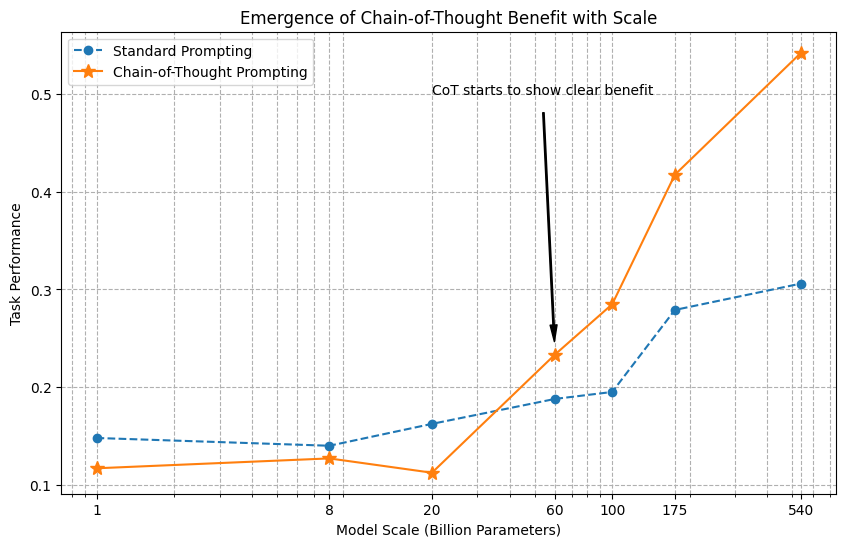

This plot shows that Chain-of-Thought (CoT) prompting may offer little to no benefit (or even harm performance) for smaller models. However, as model scale increases, CoT becomes increasingly effective, demonstrating that the utility of CoT itself is an emergent property.


In [12]:
# Simulate emergence of CoT benefit
model_sizes = np.array([1, 8, 20, 60, 100, 175, 540]) # Billion parameters

# Performance on a reasoning task
perf_standard = 0.1 + 0.08 * np.log10(model_sizes) + np.random.normal(0,0.03,len(model_sizes))
perf_standard = np.clip(perf_standard, 0.05, 0.6)

# CoT performance: little benefit or harm for small, large benefit for large
cot_effect = -0.05 + (np.log10(model_sizes)-np.log10(20)) * 0.2 # Start benefit around 20B
cot_effect[model_sizes < 20] *= 0.1 # Less impact for smaller models
perf_cot = perf_standard + cot_effect
perf_cot = np.clip(perf_cot, 0.02, 0.8)

plt.figure(figsize=(10, 6))
plt.plot(model_sizes, perf_standard, marker='o', linestyle='--', label='Standard Prompting')
plt.plot(model_sizes, perf_cot, marker='*', markersize=10, linestyle='-', label='Chain-of-Thought Prompting')
plt.xscale('log')
plt.xlabel('Model Scale (Billion Parameters)')
plt.ylabel('Task Performance')
plt.title('Emergence of Chain-of-Thought Benefit with Scale')
plt.xticks(model_sizes, labels=[str(s) for s in model_sizes])
plt.legend()
plt.grid(True, which="both", ls="--")
plt.annotate('CoT starts to show clear benefit', xy=(60, perf_cot[model_sizes==60][0] if 60 in model_sizes else 0.3),
             xytext=(20, 0.5), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.show()

print("This plot shows that Chain-of-Thought (CoT) prompting may offer little to no benefit (or even harm performance) for smaller models. However, as model scale increases, CoT becomes increasingly effective, demonstrating that the utility of CoT itself is an emergent property.")

### 13.2. CoT Unlocking Emergence

For some tasks, standard prompting might never show emergent behavior (performance remains flat/random even with scale). CoT can **unlock emergence** on these tasks.

**Example: Multi-step Arithmetic**
A complex arithmetic problem like "(15 * 3) + (22 / 2) - 7 = ?" is very hard for an LLM to solve in one shot (predicting the next token as the final answer).
*   With standard prompting, performance might remain near zero regardless of scale.
*   With CoT, by breaking it down ("15 * 3 = 45. 22 / 2 = 11. 45 + 11 = 56. 56 - 7 = 49. The answer is 49."), even models that previously showed no ability can achieve decent accuracy (e.g., 50% on some arithmetic benchmarks).

This shows CoT doesn't just improve existing abilities but can enable entirely new ones to emerge that were otherwise inaccessible.

### 13.3. Why Does Scaling Improve CoT?

Scaling appears to have a universal effect on improving various aspects of the CoT generation process.
An error analysis comparing a smaller PaLM (62B) to a larger PaLM (540B) on CoT tasks showed that scaling helped fix errors across different categories:
*   **Calculation errors:** Fewer arithmetic mistakes in the chain of thought.
*   **Logical errors:** Better adherence to the steps of the problem.
*   **Copying/Instruction Following errors:** More reliably following the format of the CoT examples.

Essentially, larger models are better at:
1.  Understanding the CoT examples.
2.  Generating coherent, logically sound intermediate steps.
3.  Performing the individual operations within those steps more accurately.

## 14. CoT for Interpretability & Multilingual CoT

Beyond raw performance, CoT offers other interesting aspects.

### 14.1. CoT as a (Limited) Interpretability Technique

**Question:** Can the chain of thought generated by an LLM be considered a window into its actual reasoning process, thus serving as an interpretability technique?

**Answer (from lecture & general understanding):**
*   **No Guarantee of Faithfulness:** There's no guarantee that the generated CoT is *how the model actually arrived at the answer internally*. The model is generating a sequence of tokens that *looks like* a plausible reasoning process based on the examples it was shown. It might sometimes rationalize an answer it arrived at through other means.
*   **Useful for Debugging:** Despite this, CoT is often useful for debugging. If a model gets a question wrong, looking at its CoT can reveal *where* its reasoning went astray (e.g., a math error, a misinterpretation of a step). This can help in refining prompts or identifying model weaknesses.
*   Anthropic has done research on "externalized reasoning oversight," which explores similar ideas for making model reasoning more transparent.

**Analogy:** It's like asking someone to explain their decision. Their explanation might be a post-hoc rationalization rather than a perfect trace of their neural activity, but it can still be informative.

### 14.2. Multilingual Chain-of-Thought

An interesting finding is that CoT can work surprisingly well in multilingual settings, even for languages that are very low-resource in the pretraining data.

**Experiment:**
*   A math word problem benchmark (like GSM8K) was translated into 10 different languages (e.g., Bengali, Swahili, Telugu, Thai).
*   The LLM (PaLM) was prompted with CoT examples *in that target language*.

**Results:**
*   The model was able to perform multi-step math reasoning and generate a CoT in these low-resource languages with surprisingly good accuracy.
*   This is remarkable because the combination of "math word problems" AND "Bengali language" is likely exceedingly rare in the pretraining data (e.g., Bengali might be <0.1% of pretraining data, and math problems a tiny fraction of that).

**Implications:**
*   This suggests that LLMs might be learning some **language-agnostic reasoning capabilities.** They learn to reason (perhaps implicitly in some more abstract representational space) and can then express that reasoning in whatever language they are prompted with, provided they have some basic grasp of that language's grammar and vocabulary.
*   It's unlikely the model learned to solve math problems *specifically in Swahili* from scratch. More likely, it learned math reasoning from English data and general language translation/generation capabilities, then combined them.

<ipython-input-13-24a68a1fd1ec>:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



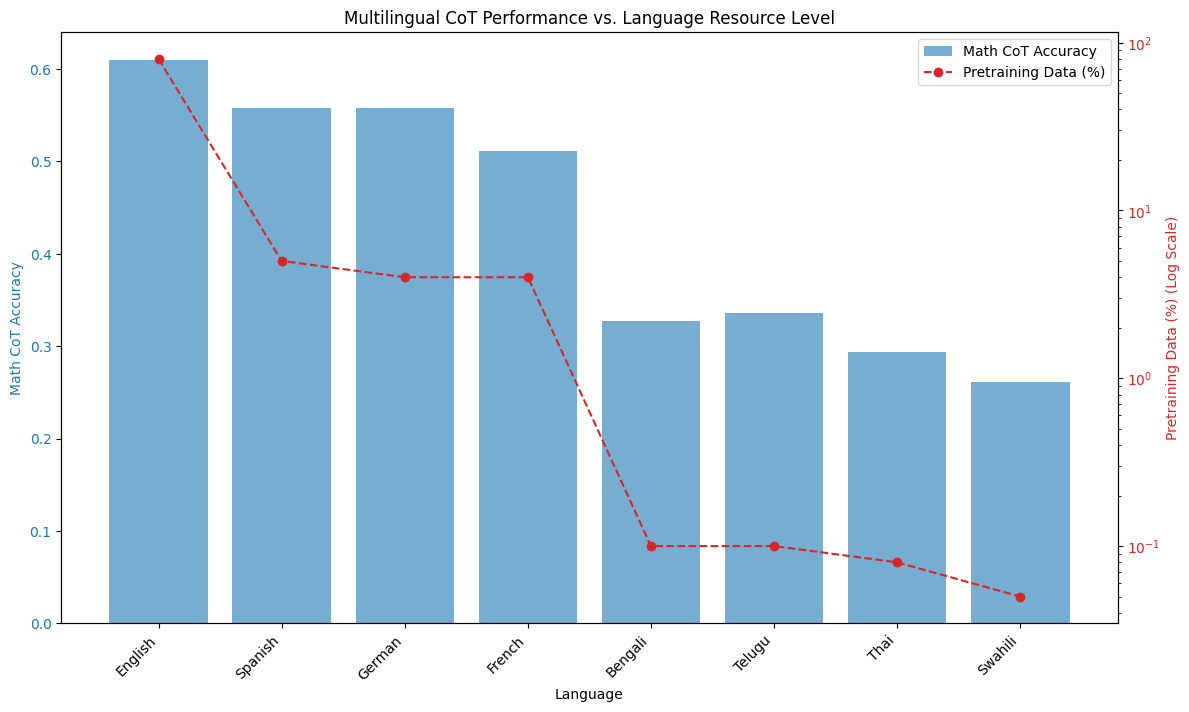

This plot illustrates that even for languages with very low representation in pretraining data (e.g., Bengali, Swahili), LLMs can achieve surprisingly good accuracy on complex reasoning tasks using Chain-of-Thought prompting in that language. Accuracy is generally higher for higher-resource languages, but the capability in low-resource ones is notable and suggests some language-agnostic reasoning.


In [13]:
# Simulate multilingual CoT performance
languages = ['English', 'Spanish', 'German', 'French', 'Bengali', 'Swahili', 'Telugu', 'Thai']
pretrain_data_percentage = [80, 5, 4, 4, 0.1, 0.05, 0.1, 0.08] # Hypothetical % in pretraining
math_accuracy_cot = pd.Series([0.60, 0.55, 0.50, 0.48, 0.35, 0.28, 0.33, 0.30]) + np.random.normal(0,0.03,len(languages))
math_accuracy_cot = np.clip(math_accuracy_cot,0.1,0.7)

df_multilingual = pd.DataFrame({
    'Language': languages,
    'Pretraining Data (%)': pretrain_data_percentage,
    'Math CoT Accuracy': math_accuracy_cot
})
df_multilingual = df_multilingual.sort_values(by='Pretraining Data (%)', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:blue'
ax1.set_xlabel('Language')
ax1.set_ylabel('Math CoT Accuracy', color=color)
ax1.bar(df_multilingual['Language'], df_multilingual['Math CoT Accuracy'], color=color, alpha=0.6, label='Math CoT Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(df_multilingual['Language'], rotation=45, ha="right")

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Pretraining Data (%) (Log Scale)', color=color) # we already handled the x-label with ax1
ax2.plot(df_multilingual['Language'], df_multilingual['Pretraining Data (%)'], color=color, marker='o', linestyle='--', label='Pretraining Data (%)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log') # Often low resource languages are orders of magnitude less

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.title('Multilingual CoT Performance vs. Language Resource Level')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

print("This plot illustrates that even for languages with very low representation in pretraining data (e.g., Bengali, Swahili), LLMs can achieve surprisingly good accuracy on complex reasoning tasks using Chain-of-Thought prompting in that language. Accuracy is generally higher for higher-resource languages, but the capability in low-resource ones is notable and suggests some language-agnostic reasoning.")

## 15. Self-Consistency: Enhancing CoT Performance

**Self-consistency** is a simple but powerful trick to further improve the performance of Chain-of-Thought prompting.

### 15.1. The Idea

Instead of generating just one chain of thought and taking its answer, self-consistency involves:
1.  **Generating Multiple Reasoning Paths:** Use the LLM with CoT prompting multiple times for the *same question*. To get diverse paths, you typically use **temperature sampling**.
    *   **Temperature Sampling:** When generating tokens, instead of always picking the highest probability token (greedy decoding), temperature sampling introduces randomness. A higher temperature makes the output more random/creative; a lower temperature makes it more deterministic/focused. For self-consistency, a moderate temperature (e.g., 0.5-0.7) is often used to get varied but still plausible reasoning chains.
2.  **Extracting Final Answers:** From each generated chain of thought, extract the final answer.
3.  **Majority Vote:** Take a majority vote over all the extracted final answers. The most frequent answer is chosen as the definitive output.

**Intuition:** Different reasoning paths might lead to the same correct answer, while incorrect paths might lead to a variety of different wrong answers. The correct answer is often more robust and arrived at through multiple valid lines of reasoning.

### 15.2. Performance Boost

Self-consistency can lead to substantial improvements over standard CoT.
*   **Example (GSM8K):** The lecture mentions that for PaLM on GSM8K, standard CoT might achieve ~56% accuracy. With self-consistency (e.g., sampling 40 paths), this could jump to ~74% accuracy.

**Trade-off:** The main cost is increased inference compute, as you're running the model multiple times for each question. However, the performance gain can be well worth it for complex reasoning tasks.
The number of paths to sample (e.g., k=16 or k=40) is a hyperparameter. More paths generally help up to a point, but with diminishing returns.

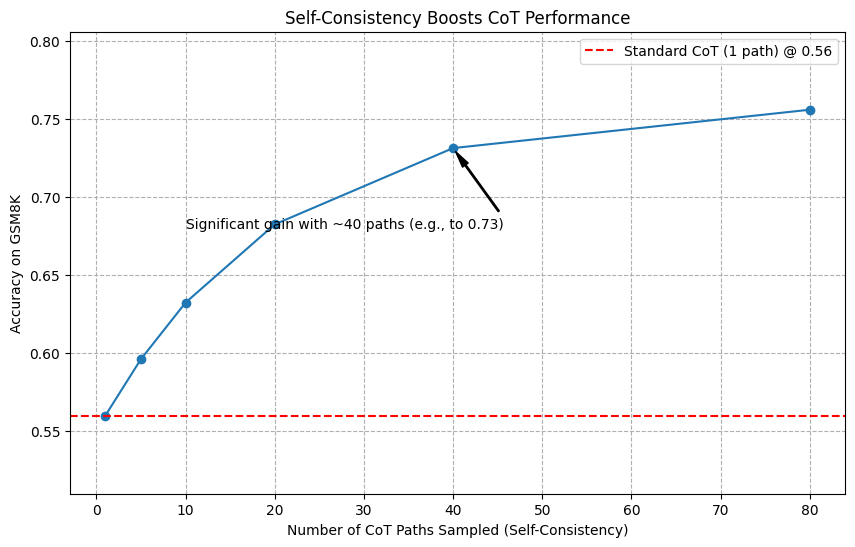

Self-consistency significantly improves performance by sampling multiple reasoning paths and taking a majority vote. The plot shows how accuracy increases with the number of paths sampled, typically with diminishing returns. A common choice might be 16 to 40 paths.


In [14]:
# Simulate self-consistency improvement
num_paths_sampled = np.array([1, 5, 10, 20, 40, 80]) # Number of CoT paths sampled

# Accuracy on GSM8K (hypothetical)
base_cot_accuracy = 0.56 # Accuracy with 1 path (standard CoT)
# Self-consistency provides diminishing returns
improvement_factor = 0.20 * (1 - np.exp(-0.05 * (num_paths_sampled -1)))
gsm8k_self_consistency_accuracy = base_cot_accuracy + improvement_factor
gsm8k_self_consistency_accuracy = np.clip(gsm8k_self_consistency_accuracy, base_cot_accuracy, 0.80)

plt.figure(figsize=(10, 6))
plt.plot(num_paths_sampled, gsm8k_self_consistency_accuracy, marker='o', linestyle='-')
plt.xlabel('Number of CoT Paths Sampled (Self-Consistency)')
plt.ylabel('Accuracy on GSM8K')
plt.title('Self-Consistency Boosts CoT Performance')
plt.grid(True, which="both", ls="--")
plt.axhline(y=base_cot_accuracy, color='r', linestyle='--', label=f'Standard CoT (1 path) @ {base_cot_accuracy:.2f}')
plt.legend()
plt.ylim(base_cot_accuracy - 0.05, max(gsm8k_self_consistency_accuracy) + 0.05)
plt.annotate(f'Significant gain with ~40 paths (e.g., to {gsm8k_self_consistency_accuracy[num_paths_sampled==40][0]:.2f})',
             xy=(40, gsm8k_self_consistency_accuracy[num_paths_sampled==40][0]),
             xytext=(10, 0.68), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))
plt.show()

print("Self-consistency significantly improves performance by sampling multiple reasoning paths and taking a majority vote. The plot shows how accuracy increases with the number of paths sampled, typically with diminishing returns. A common choice might be 16 to 40 paths.")

### 15.3. Emergence of Self-Consistency Benefit

Similar to CoT itself, the significant benefit from self-consistency also appears to be an **emergent property**.
*   For smaller models where CoT barely works or is unreliable, sampling multiple unreliable paths and voting doesn't help much.
*   It's when models are large enough to produce somewhat diverse and plausible (even if not always correct) reasoning paths that self-consistency provides a large delta in performance.

This reinforces the theme that many advanced prompting and reasoning techniques only unlock their full potential at larger model scales.

## 16. Future Directions & Conclusion

The lecture concludes by highlighting promising research directions and summarizing the implications of emergent abilities and advanced prompting techniques.

### 16.1. Key Research Areas

1.  **Better Prompting & Characterization of Abilities:**
    *   We are still exploring the best ways to prompt LLMs.
    *   Systematically understanding and characterizing the full range of LLM abilities (and their limitations) is ongoing.
    *   Developing more robust and general prompt engineering strategies.

2.  **Applied Work and Real-World Applications:**
    *   Leveraging LLMs for practical benefits in diverse fields: education (e.g., tutoring), science (e.g., hypothesis generation, data analysis), creative writing, therapy assistance, programming, etc.
    *   ChatGPT demonstrated the broad applicability of LLMs.

3.  **Better Benchmarks:**
    *   Current benchmarks are often solved quickly as models improve (e.g., PaLM beating average human on BIG-bench Hard within a year).
    *   Need for more challenging, nuanced, and comprehensive benchmarks to drive future progress and accurately measure capabilities, especially in complex reasoning, common sense, and safety.

4.  **Compute-Efficient Methods:**
    *   Making LLMs better without simply scaling them to astronomical sizes.
    *   Research into more efficient architectures, training methods, distillation, quantization, and prompting techniques to make powerful LLM capabilities more accessible and less expensive to use.
    *   Reducing the environmental impact of training and deploying large models.

### 16.2. Final Thoughts

The study of emergent abilities and techniques like Chain-of-Thought prompting has fundamentally changed our understanding of what LLMs can do and how to interact with them.

*   **Scaling is not just about quantitative gains; it unlocks qualitative leaps in capability.**
*   **Prompting is a powerful way to guide and elicit complex behaviors from these models.**
*   There's a continuous interplay between scaling models, developing better interaction techniques, and designing more challenging tasks to push the frontiers of AI.

The field is rapidly evolving, and understanding these concepts is crucial for anyone working with or researching large language models.

## 17. Interactive Example: Exploring a Simplified CoT

Let's try a very simple, conceptual example to illustrate how providing intermediate steps might help a (simulated) 'dumb' model.

In [15]:
def simple_arithmetic_model(problem_str, show_steps=False):
    """A highly simplified mock model for arithmetic problems."""
    parts = problem_str.split()
    # Expects format like "X + Y" or "X - Y" or "X * Y"
    # This model is very basic and fragile.

    if not show_steps:
        # Standard prompting: try to solve in one go (and likely fail for complex)
        if len(parts) == 3: # e.g. "5 + 6"
            try:
                num1 = int(parts[0])
                op = parts[1]
                num2 = int(parts[2])
                if op == '+': result = num1 + num2
                elif op == '-': result = num1 - num2
                elif op == '*': result = num1 * num2
                else: result = "Error: Unknown simple operation"
                return f"The answer is {result}."
            except:
                return "Error: Could not parse simple problem."
        else: # Cannot handle more complex problems like "5 + 6 * 2" directly
            return "Error: Too complex for direct answer. I might guess randomly: 42?"

    else:
        # CoT style: problem might already be broken down, or we simulate breaking it down
        # For this toy example, let's assume the CoT prompt helps us by breaking it down:
        # e.g., problem_str = "First, 6 * 2 is 12. Then, 5 + 12 is 17."
        # A real CoT would have the model *generate* these steps.
        # Here, we just parse the *final* step of an explicit CoT.
        if "Then, " in problem_str and "is" in problem_str.split("Then, ")[-1]:
            final_step = problem_str.split("Then, ")[-1]
            # Example: "5 + 12 is 17."
            try:
                sub_parts = final_step.split()
                # Look for "is X." pattern
                if sub_parts[-2] == "is" and sub_parts[-1].endswith('.'):
                    final_ans = sub_parts[-1][:-1]
                    reasoning_path = problem_str.split("Then, ")[0] + "Then, " + " ".join(sub_parts[:-2]) + f" is {final_ans}."
                    return f"{reasoning_path} The final answer is {final_ans}."
                else:
                     return "Error: CoT final step unclear."
            except:
                return "Error: Could not parse CoT final step."
        elif "is" in problem_str: # simple single step CoT like "5 + 6 is 11."
             try:
                sub_parts = problem_str.split()
                if sub_parts[-2] == "is" and sub_parts[-1].endswith('.'):
                    final_ans = sub_parts[-1][:-1]
                    reasoning_path = " ".join(sub_parts[:-2]) + f" is {final_ans}."
                    return f"{reasoning_path} The final answer is {final_ans}."
                else: return "Error: Simple CoT unclear"
             except: return "Error: Could not parse simple CoT."
        else:
            return "Error: CoT structure not recognized for this toy model."

# --- Interactive Test ---
print("--- Standard Prompting (Model tries to answer directly) ---")
problem1_std = "5 + 6"
print(f"Q: {problem1_std}\nA: {simple_arithmetic_model(problem1_std, show_steps=False)}\n")

problem2_std = "5 + 6 * 2" # This model will fail here without CoT structure
print(f"Q: {problem2_std}\nA: {simple_arithmetic_model(problem2_std, show_steps=False)}\n")

print("--- Chain-of-Thought Style (Model is given/follows steps) ---")
# We manually provide the CoT structure for this toy model
problem1_cot_explicit = "5 + 6 is 11."
print(f"Q (with explicit CoT): {problem1_cot_explicit}\nA: {simple_arithmetic_model(problem1_cot_explicit, show_steps=True)}\n")

problem2_cot_explicit = "First, 6 * 2 is 12. Then, 5 + 12 is 17."
print(f"Q (with explicit CoT): {problem2_cot_explicit}\nA: {simple_arithmetic_model(problem2_cot_explicit, show_steps=True)}\n")

print("\nThis toy example shows that if a model is 'guided' with intermediate steps (as in CoT), ")
print("it can arrive at answers for problems it couldn't solve directly. A real LLM learns to *generate* these steps.")

--- Standard Prompting (Model tries to answer directly) ---
Q: 5 + 6
A: The answer is 11.

Q: 5 + 6 * 2
A: Error: Too complex for direct answer. I might guess randomly: 42?

--- Chain-of-Thought Style (Model is given/follows steps) ---
Q (with explicit CoT): 5 + 6 is 11.
A: 5 + 6 is 11. The final answer is 11.

Q (with explicit CoT): First, 6 * 2 is 12. Then, 5 + 12 is 17.
A: First, 6 * 2 is 12. Then, 5 + 12 is 17. The final answer is 17.


This toy example shows that if a model is 'guided' with intermediate steps (as in CoT), 
it can arrive at answers for problems it couldn't solve directly. A real LLM learns to *generate* these steps.
